# Image Captioning with Minimal Detailes

[Original source code](https://huggingface.co/atasoglu/vit-gpt2-flickr8k)

Vision Encoder Decoder (ViT + GPT2) model that fine-tuned on flickr8k-dataset for image-to-text task.

The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


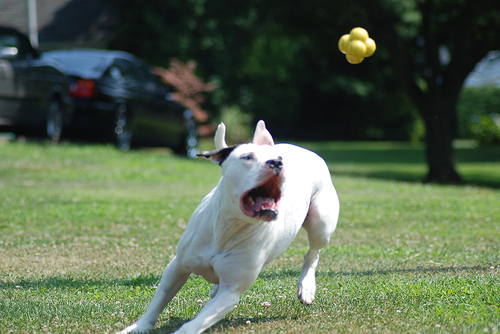

['A dog is running in a field with a ball in its mouth.'] 



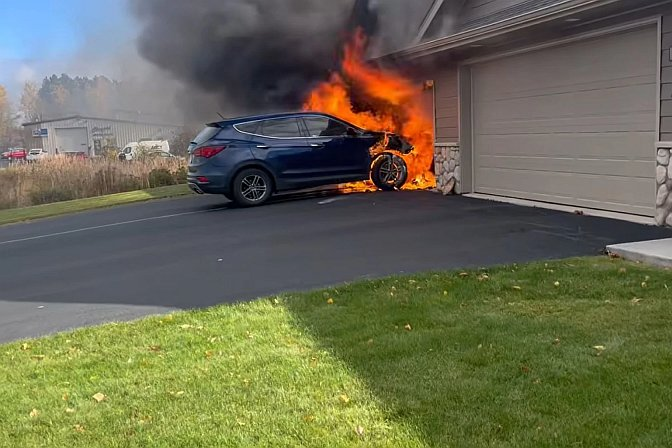

['A car is being driven through a mud puddle.'] 



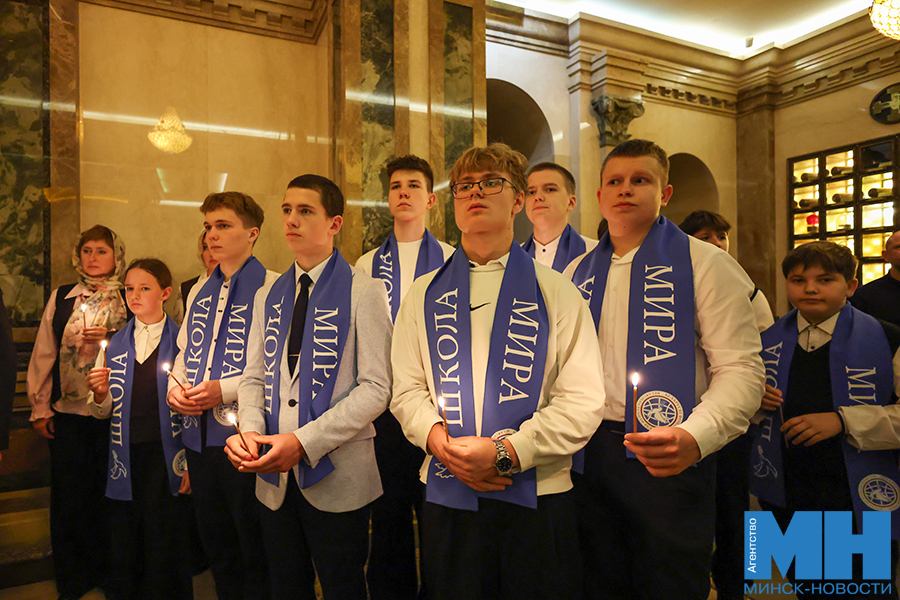

['A group of people are standing in front of a building.'] 



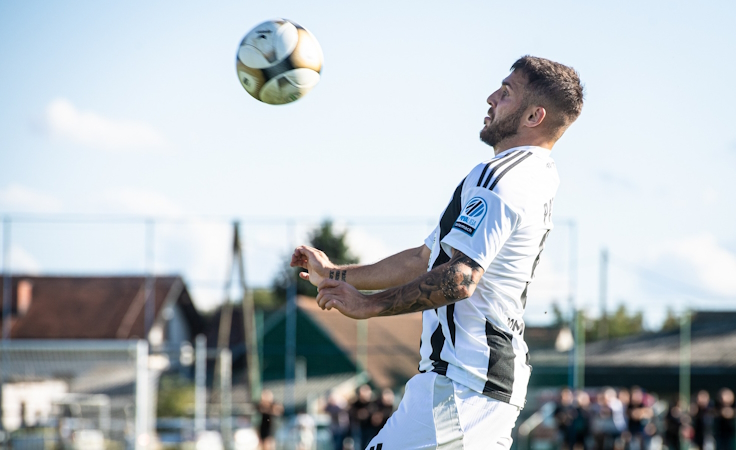

['A man in a blue shirt is kicking a soccer ball while another man watches.'] 



In [1]:
import torch
import requests

from PIL import Image
from io import BytesIO
from transformers import VisionEncoderDecoderModel, ViTImageProcessor, AutoTokenizer


def get_caption(model, path):
    """ Get image caption from the Internet or from a file path """
    # load image
    if path.startswith("https://"):  # download from the Internet
        response = requests.get(path)
        img = Image.open(BytesIO(response.content))
    else:  # from the file path
        img = Image.open(path)
    
    # encode (extracting features)
    pixel_values = feature_extractor(images=[img], return_tensors="pt").pixel_values
    pixel_values = pixel_values.to(device)
    
    # generate caption
    output_ids = model.generate(pixel_values)
    
    # decode
    preds = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
    
    display(img)
    print(preds, "\n")


MODEL = "atasoglu/vit-gpt2-flickr8k"  # pretrained model

# load models
feature_extractor = ViTImageProcessor.from_pretrained(MODEL)
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = VisionEncoderDecoderModel.from_pretrained(MODEL)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

get_caption(model, "./data/test_image_01.png")
get_caption(model, "./data/test_image_02.jpg")
get_caption(model, "https://minsknews.by/wp-content/uploads/2025/10/120a8130-kopiya.jpg")
get_caption(model, "https://football.by/storage/images/post_img/1759599441.jpg")